In [1]:
pip install pandas matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import zipfile

zip_path = r'C:\Users\vamsi\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_87.zip'

# List all files in the ZIP
with zipfile.ZipFile(zip_path, 'r') as z:
    file_list = z.namelist()
    print("Files inside ZIP:", file_list)


Files inside ZIP: ['Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_87.csv', 'API_SP.POP.TOTL_DS2_en_csv_v2_87.csv', 'Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_87.csv']


In [9]:
import pandas as pd
import zipfile

# Define the ZIP file path
zip_path = r'C:\Users\vamsi\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_87.zip'
csv_filename = 'API_SP.POP.TOTL_DS2_en_csv_v2_87.csv'  # Main data file

# Open ZIP and read CSV
with zipfile.ZipFile(zip_path, 'r') as z:
    with z.open(csv_filename) as file:
        df = pd.read_csv(file, skiprows=4)

# Display first few rows
print(df.head())


                  Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54922.0      55578.0      56320.0      57002.0      57619.0   
1  130072080.0  133534923.0  137171659.0  140945536.0  144904094.0   
2    9035043.0    9214083.0    9404406.0    9604487.0    9814318.0   
3   97630925.0   99706674.0  101854756.0  104089175.0  106388440.0   
4    5231654.0    5301583.0    5354310.0    5408320.0    5464187.0   

          1965  ...         2015         2016         2017         2018  \
0      58190.0  .

In [10]:
# Identify the most recent year column
most_recent_year = df.columns[-1]  # Last column is usually the latest year

# Keep only relevant columns
df = df[['Country Name', most_recent_year]].dropna()

# Rename columns for better readability
df.columns = ['Country', 'Population']

# Convert population to numeric
df['Population'] = pd.to_numeric(df['Population'], errors='coerce')

# Drop any invalid values
df = df.dropna()

# Display cleaned data
print(df.head())


Empty DataFrame
Columns: [Country, Population]
Index: []


C:\Users\vamsi\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  fig.canvas.print_figure(bytes_io, **kw)


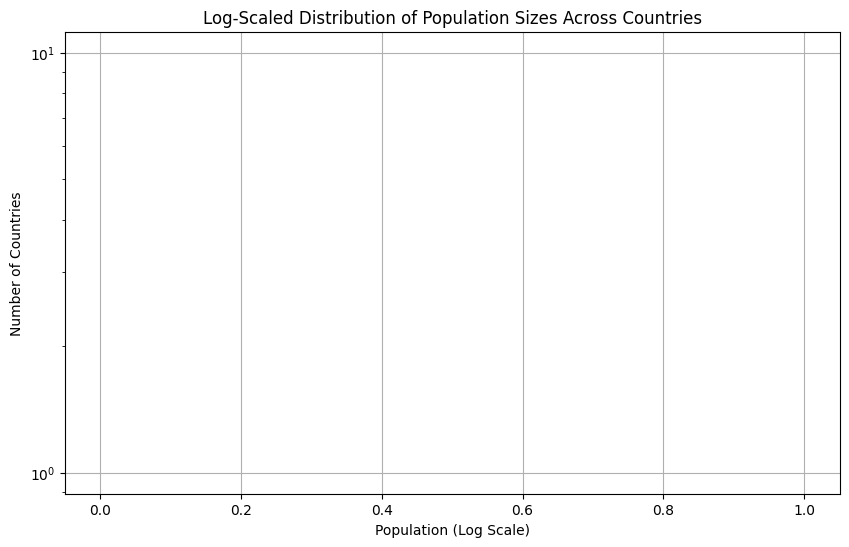

In [11]:
import matplotlib.pyplot as plt

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Population'], bins=30, edgecolor='black', log=True)  # Log scale for better visibility

# Customize the chart
plt.title('Log-Scaled Distribution of Population Sizes Across Countries')
plt.xlabel('Population (Log Scale)')
plt.ylabel('Number of Countries')
plt.grid(True)

# Show the plot
plt.show()
